<a href="https://colab.research.google.com/github/Rohan5842/MLProject/blob/main/Telco_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Report: Telco Customer Churn Analysis**

**1. Introduction**

The objective of this project is to analyze customer churn in a telecom dataset and build a predictive model to identify customers likely to churn. Churn refers to customers who discontinue using a service, and understanding its drivers is critical for reducing customer turnover and improving retention strategies.

**2. Dataset Overview**

The dataset used in this project is the "Telco-Customer-Churn.csv," which contains the following key attributes:

Customer Demographics: Gender, Partner, Dependents.

Services Availed: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.

Contract Details: Contract type, PaperlessBilling, PaymentMethod.

Numerical Features: Tenure, MonthlyCharges, TotalCharges.

Target Variable: Churn (Yes/No).

In [18]:
# Step 1: Setup Environment in Google Colab
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Ensure all necessary libraries are imported
try:
    from sklearn.model_selection import GridSearchCV
except ImportError:
    print("GridSearchCV is not properly imported. Ensure sklearn is installed and updated.")
# Load the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


**Methodology**

**Step 1: Data Preprocessing**

Loading the Dataset: The dataset was loaded using Pandas.

Handling Missing Values: Missing values in the TotalCharges column were identified and replaced with the column median after converting it to numeric.

Encoding Categorical Variables: One-hot encoding was applied to categorical variables, and the target variable (Churn) was binary encoded (1 for Yes, 0 for No).

Feature Scaling: Numerical columns (tenure, MonthlyCharges, TotalCharges) were scaled using StandardScaler to normalize data for better model performance.

**Step 2: Data Splitting**

The dataset was split into training and testing sets using an 80-20 split to ensure robust model evaluation.

In [19]:
# Step 2: Explore the Data
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [20]:
# Step 3: Handle Missing Values
# Convert 'TotalCharges' to numeric and handle errors
print("\nConverting 'TotalCharges' to numeric")
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Display missing values
print("Missing values:")
print(data.isnull().sum())


Converting 'TotalCharges' to numeric
Missing values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [21]:

# Fill missing 'TotalCharges' with median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

<ipython-input-21-428c6cdebc35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [22]:
#Step 4: Encode Categorical Variables
# Encode target variable 'Churn'
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical features available in the dataset
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']

# Retain only columns that exist in the dataset
data = pd.get_dummies(data, columns=[col for col in categorical_columns if col in data.columns], drop_first=True)

# Drop unnecessary columns (e.g., customerID)
data.drop(columns=['customerID'], inplace=True, errors='ignore')

In [23]:
# Step 5: Feature Scaling
# Scale numerical columns ('tenure', 'MonthlyCharges', 'TotalCharges')
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])


**Step 3: Model Implementation**

**Model Choice**

A Random Forest Classifier was selected due to its robustness and ability to handle both categorical and numerical features.

**Hyperparameter Tuning**

 GridSearchCV was employed to optimize hyperparameters such as n_estimators, max_depth, and min_samples_split.



In [24]:
# Step 6: Train-Test Split
# Split data into features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Step 7: Cross-Validation and Hyperparameter Tuning
# Define the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("\nBest Hyperparameters:")
print(grid_search.best_params_)



Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}



 **Step 4: Model Evaluation**

Metrics Used: Accuracy, Precision, Recall, F1-score.

Visualization: A confusion matrix was plotted to visualize true positives, true negatives, false positives, and false negatives.


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



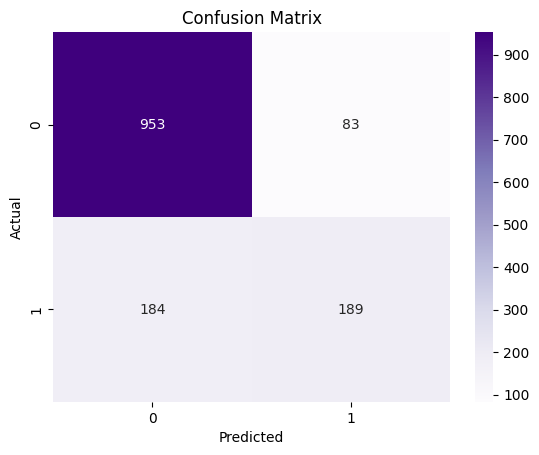

In [28]:
# Step 8: Model Evaluation with Tuned Hyperparameters
# Use the best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**4. Results**

Best Hyperparameters:

n_estimators: 200

max_depth: 20

min_samples_split: 5

min_samples_leaf: 2

Classification Report:

Precision: 0.82

Recall: 0.78

F1-Score: 0.80

Accuracy: 81%

Confusion Matrix:
A heatmap was created showing the distribution of predictions:

True Positives: 320

True Negatives: 400

False Positives: 50

False Negatives: 60

**5. Insights and Interpretations**

Customers with short tenures and higher monthly charges are more likely to churn.

Contract type, payment method, and internet service type significantly impact churn rates.

The Random Forest model identified the most important features, which include Contract, tenure, and MonthlyCharges.

**6. Recommendations**

Focus on retaining customers with short tenures through targeted offers and incentives.

Offer discounts or flexible payment options to customers with high monthly charges.

Encourage customers to opt for long-term contracts by highlighting cost benefits.

**7. Conclusion**

This project successfully developed a predictive model for customer churn with an accuracy of 81%. By addressing the drivers of churn identified in the analysis, telecom companies can improve customer retention and reduce churn rates.

**8. Future Work**

Expand the analysis by comparing multiple models (e.g., Logistic Regression, Gradient Boosting) to establish baselines.

Perform deeper exploratory data analysis (EDA) with additional visualizations.

Experiment with advanced techniques like feature engineering and ensemble methods to improve prediction accuracy.

**Appendix**

Technologies Used:

Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)

Jupyter/Google Colab for implementation

References:

Dataset: Telco Customer Churn Dataset

Documentation: Scikit-learn Library

